In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle

In [2]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

C:\Users\ankit\AppData\Local\Temp\ipykernel_21008\1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
C:\Users\ankit\AppData\Local\Temp\ipykernel_21008\1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


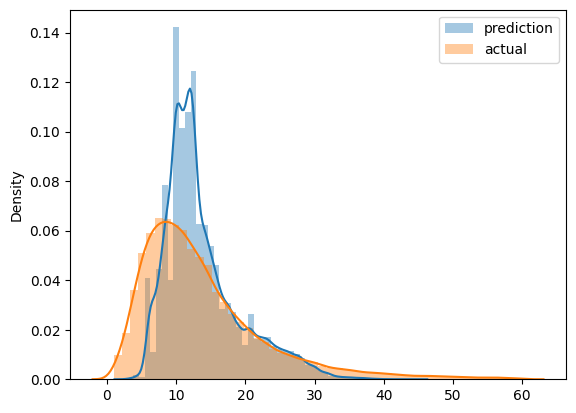

In [10]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [11]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [13]:
df_train = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-02.parquet')
df_val = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-03.parquet')

In [15]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)


[{'PU_DO': '75_161', 'trip_distance': 2.77}, {'PU_DO': '43_242', 'trip_distance': 7.76}, {'PU_DO': '75_238', 'trip_distance': 1.03}, {'PU_DO': '80_17', 'trip_distance': 1.36}, {'PU_DO': '97_25', 'trip_distance': 0.34}, {'PU_DO': '97_97', 'trip_distance': 0.34}, {'PU_DO': '25_181', 'trip_distance': 1.36}, {'PU_DO': '92_223', 'trip_distance': 5.88}, {'PU_DO': '255_48', 'trip_distance': 5.1}, {'PU_DO': '260_260', 'trip_distance': 0.89}, {'PU_DO': '74_263', 'trip_distance': 2.36}, {'PU_DO': '210_265', 'trip_distance': 16.5}, {'PU_DO': '42_244', 'trip_distance': 2.6}, {'PU_DO': '42_250', 'trip_distance': 7.06}, {'PU_DO': '202_260', 'trip_distance': 3.14}, {'PU_DO': '75_162', 'trip_distance': 1.89}, {'PU_DO': '82_129', 'trip_distance': 0.58}, {'PU_DO': '75_75', 'trip_distance': 0.97}, {'PU_DO': '95_95', 'trip_distance': 0.98}, {'PU_DO': '255_112', 'trip_distance': 1.08}, {'PU_DO': '74_75', 'trip_distance': 1.12}, {'PU_DO': '83_76', 'trip_distance': 7.55}, {'PU_DO': '75_238', 'trip_distance':

In [16]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values


In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred)

35.40803050256635

C:\Users\ankit\AppData\Local\Temp\ipykernel_21008\2624495092.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
C:\Users\ankit\AppData\Local\Temp\ipykernel_21008\2624495092.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_val, label='actual')


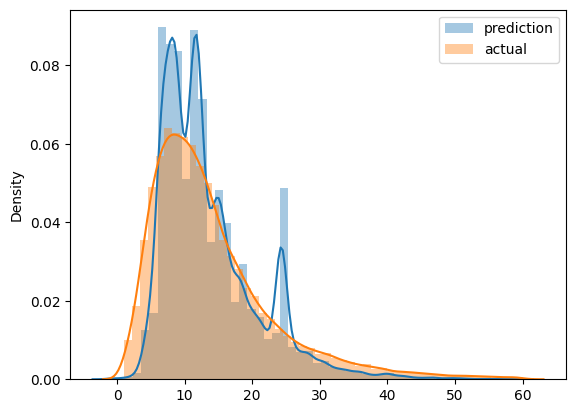

In [18]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_val, label='actual')

plt.legend()

In [21]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [20]:
lr = Lasso(0.001)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred)

43.072464380015255